circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [3]:
library(UpSetR)
library(readxl)
library(ggplot2)
library(clusterProfiler)
library(ClusterGVis)
library(Mfuzz)
library(AnnotationHub) 
library(biomaRt)
library(ComplexHeatmap)
library(dplyr)
library(stringr)
library(circlize)
library(pheatmap)


Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap




## plot heatmap1
high correlation with sugar genes in grafting stages, heatmap view these genes expression in HAG samples

In [6]:
df <- read.table("heatmap1.csv", sep="\t", header=TRUE, row.names=1)
df_meta <- read.table("heatmap1_meta.csv", sep="\t", header=TRUE, row.names=2)
df_meta <- df_meta[,c('Condition', 'HAG')]
df_meta$Condition <- factor(df_meta$Condition, levels=c('C', 'D', 'CC', 'DD', 'CD'))

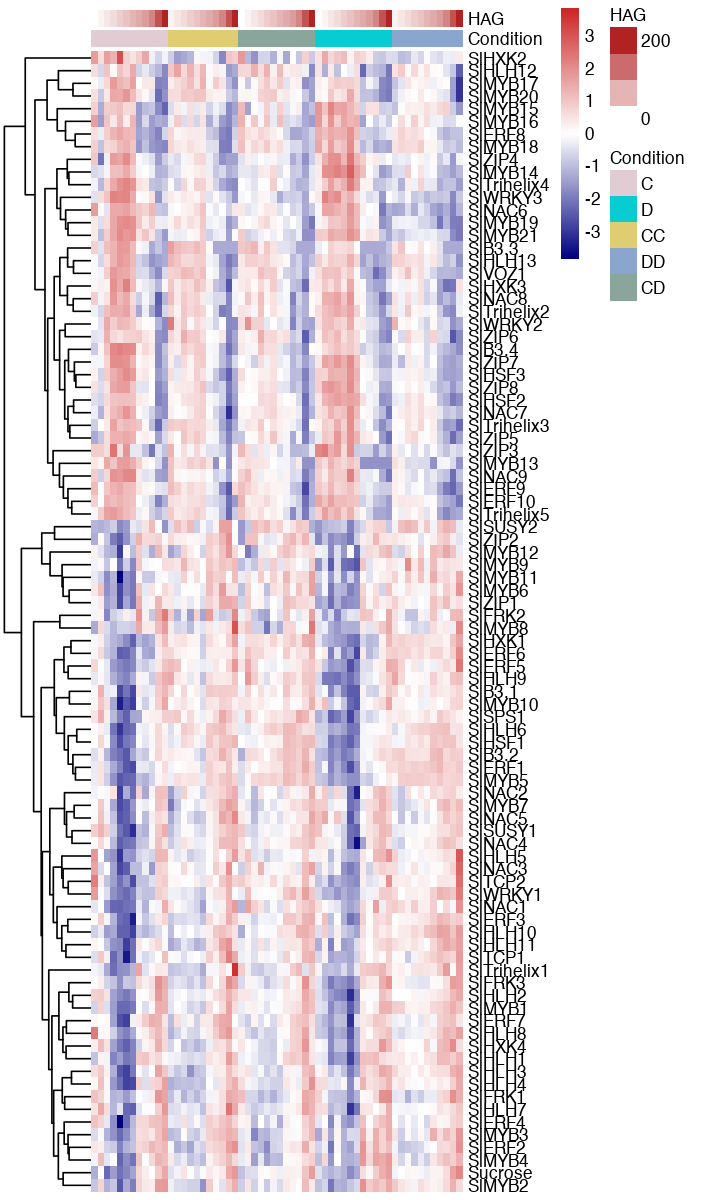

In [7]:
options(repr.plot.width=6, repr.plot.height=10)
#pdf('heatmap1.pdf', width = 12, height=10)

ann_colors = list(
  HAG = c("white", "firebrick"),
  Condition = c(C = "#E0CCD2", D = "#07CCD2", CC = "#E0CC71", DD = "#8AA6CE", CD = "#8AA69C")
)

pheatmap(log2(df+0.01), annotation_col = df_meta, annotation_colors=ann_colors, border_color=NA,
         cluster_rows=TRUE, cluster_cols=FALSE, 
         show_rownames=TRUE, show_colnames=FALSE, 
         color = colorRampPalette(c("navy","white","firebrick3"))(256),
         scale = "row", 
         width=10, height=12,)
         #filename="heatmap1.pdf")

#dev.off()

## plot heatmap2
high correlation with sugar TFs in grafting stages, heatmap view these TFs expression in HAG samples

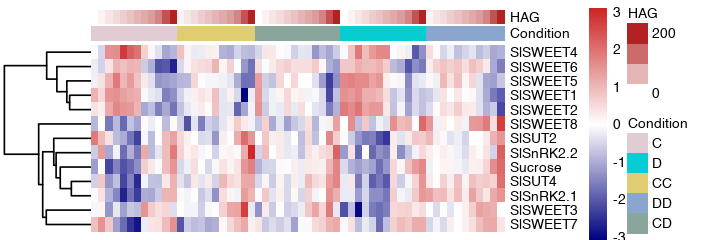

In [9]:
df2 <- read.table("heatmap2.csv", sep="\t", header=TRUE, row.names=1)
df_meta2 <- read.table("heatmap1_meta.csv", sep="\t", header=TRUE, row.names=2)
df_meta2 <- df_meta2[,c('Condition', 'HAG')]
df_meta2$Condition <- factor(df_meta2$Condition, levels=c('C', 'D', 'CC', 'DD', 'CD'))

options(repr.plot.width=6, repr.plot.height=2)
#pdf('heatmap1.pdf', width = 12, height=10)

ann_colors = list(
  HAG = c("white", "firebrick"),
  Condition = c(C = "#E0CCD2", D = "#07CCD2", CC = "#E0CC71", DD = "#8AA6CE", CD = "#8AA69C")
)

pheatmap(log2(df2+0.01), annotation_col = df_meta2, annotation_colors=ann_colors, border_color=NA,
         cluster_rows=TRUE, cluster_cols=FALSE, 
         show_rownames=TRUE, show_colnames=FALSE, 
         color = colorRampPalette(c("navy","white","firebrick3"))(256),
         scale = "row", fontsize=8,
         width=6, height=2,)
         #filename="heatmap2.pdf")

#dev.off()

## another view type

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


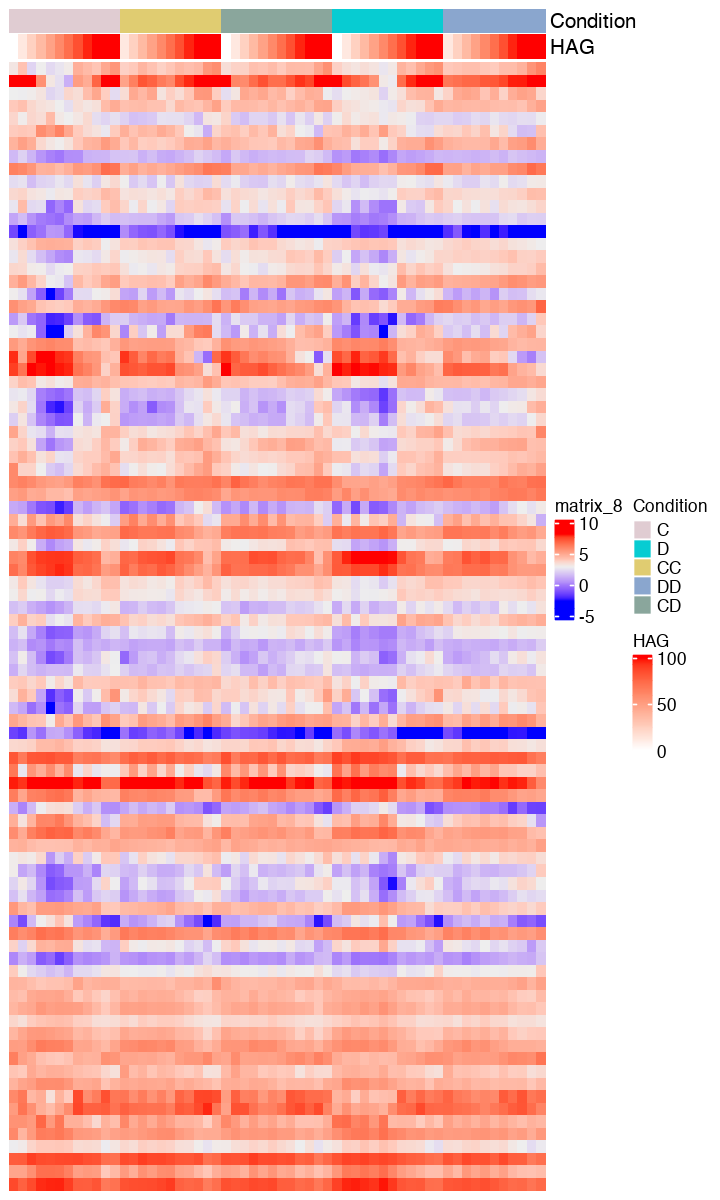

In [47]:
ha1 = HeatmapAnnotation(df = df_meta,
                        col = list(Condition = c("C" = "#E0CCD2", "D" = "#07CCD2", "CC" = "#E0CC71", "DD" = "#8AA6CE", "CD" = "#8AA69C"),
                                   HAG = colorRamp2(c(0, 100), c("white", "red")))
)

Heatmap(log2(df+0.1), top_annotation = ha1, 
        cluster_columns=FALSE, cluster_rows=FALSE, 
        show_row_names=FALSE, show_column_names=FALSE)
